In [87]:
# import libraries
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import sklearn.linear_model

In [88]:
# Create x0 , x1 data 
# I happened to create two separate variables of 200 instances... later will have to reshape this
sample_size = 200
number_of_features = 2
# data = np.random.normal(loc = 456, scale = 45, size = (number_of_features,sample_size)) # if you want normally distributed variables
data = np.random.choice(list(range(1000)), (number_of_features,sample_size), list(range(1000)))
data[0] # x0 data

array([212, 471, 923, 591, 163, 614, 890, 806, 330, 939, 116, 909, 882,
       149, 732, 237, 428, 823,  49, 272, 118,  25, 638, 718, 366, 702,
       179, 885, 899, 102, 536, 955, 649, 244, 234, 699, 677, 863, 498,
       173, 274, 402, 678, 462, 714, 924, 220, 505, 988, 343, 754, 527,
        51, 102, 961, 958, 503, 788, 616, 248, 344, 622, 874, 110, 441,
       485, 462, 547,  48, 102, 565, 902, 450, 701, 601, 934,  31, 865,
       859, 955, 263,  87,   5, 965, 143, 420, 963,  23, 134, 855, 689,
       410, 485, 375,  72, 312, 734, 208, 109, 809,  49, 799, 994, 923,
       634, 522, 729, 258, 388, 897,  25,  61, 652,  47, 671, 316, 695,
       743, 549, 817, 841, 297, 635, 445, 679, 605, 341, 101, 412, 537,
       471, 490, 416, 397, 174, 723, 100, 993, 586, 949, 687, 460, 756,
       258, 127, 818, 605, 682, 620, 556, 583, 670, 806, 154, 393, 478,
       589,  97,  64, 497, 385, 921, 739, 971, 174, 511, 692, 763, 399,
       778, 254, 833, 698, 834, 483, 437, 751, 331, 839, 296, 35

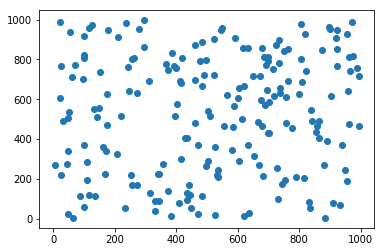

In [89]:
# plot x0 vs x1 (inputs) data
plt.scatter(data[0],data[1])
plt.show()

In [90]:
# rename + reformat data and create response variable 'Y'
data_x_0, data_x_1 = data[0].reshape(-1, 1), data[1].reshape(-1, 1)

# create response variable
epsilons = np.random.normal(loc=0.0, scale=( max(data_x_0) + max(data_x_1) )/5, size=sample_size).reshape(-1,1) # create some error terms
data_y = [3*data_x_0[i] - 5*data_x_1[i] + epsilons[i]
          for i in range(sample_size)] 

## data_y defines y = f(x0, x1)
print(data_y[0])



[-3451.73904085]


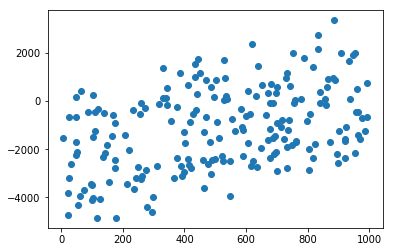

In [91]:
plt.scatter(data_x_0,data_y)
plt.show()


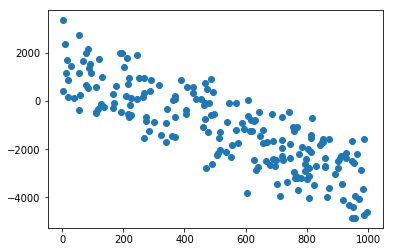

In [92]:
plt.scatter(data_x_1,data_y)
plt.show()


In [93]:
# data shape - two separate lists of x input data, shape = [n_features, n_samples] = [2,200]
# reshape data for sklearn - shape = [n_samples,n_features] = [200,2]

reshaped_data = np.zeros(shape=(sample_size,number_of_features)) # initialize
for i in range(sample_size):
    reshaped_data[i] = np.array([data[0][i], data[1][i]])
    
reshaped_data[0] #x0 , x1 pair

array([ 212.,  913.])

In [94]:
# train model
lr = sklearn.linear_model.LinearRegression()
_ = lr.fit(reshaped_data, data_y)

In [95]:
# get new data

# guassian pdf centered at 1000/2 ~ 
# can dump normalization factor since it effects all terms uniformly
probability_dist = [ np.exp(- ( i-1000/2 )**2 / (2 * (1000/200)**2)) for i in range(1000) ]
new_data = np.random.choice(list(range(1000)), (sample_size,number_of_features), probability_dist)

# get new 'y' response data using the same distribution.....
# Y = 3X_0 - 5 X_1 + epsilon
epsilons = np.random.normal(loc=0.0, scale=max(data_x_0)/5, size=200).reshape(-1,1) # new errors
new_y_data = [3*new_data[i][0] - 5*new_data[i][1] + epsilons[i] for i in range(sample_size)] 

print('features: ', new_data[0], ', response: ', new_y_data[0]) # an x_0 , x_1 pair and response

features:  [910 696] , response:  [-591.22362808]


In [96]:
# will want to be able to project the data onto x0 and x1 dimensions, 
# in order to understand the regression model for those features 

x0 = [ new_data[i][0] for i in range(sample_size) ]
x1 = [ new_data[i][1] for i in range(sample_size) ]

# get mean of x_0, x_1:
x_zero_mean = np.mean(x0)
x_one_mean = np.mean(x1)

# initialize projected datasets
x0 = np.zeros(shape=(sample_size,number_of_features)) # 
x1 = np.zeros(shape=(sample_size,number_of_features)) # 

for i in range(sample_size):
    x0[i] = np.array([new_data[i][0], x_one_mean]) # project onto x0
    x1[i] = np.array([x_zero_mean, new_data[i][1]]) # project onto x1
    

In [97]:
# plot regression model only on newdata[0]
# so set new_data[1] = avg val so predictions only use newdata[0]


# view data
print('these should be mean value - padded: ', [ x1[i][0] for i in range(5) ], '\n')
print('these should be mean value - padded: ', [ x0[i][1] for i in range(5) ], '\n')
print('', 'processed test x_0 data', '\n'*2, [x0[i][0] for i in range(5)], '\n'*2, 
      'processed test x_1 data', '\n'*2, [x1[i][1] for i in range(5)], '\n'*2, end='')


# predict on each dataset
predictions_x0 = lr.predict(x0)
predictions_x1 = lr.predict(x1)

# print(predictions_x0[0:5])
# print(predictions_x1[0:5])

these should be mean value - padded:  [497.245, 497.245, 497.245, 497.245, 497.245] 

these should be mean value - padded:  [471.48000000000002, 471.48000000000002, 471.48000000000002, 471.48000000000002, 471.48000000000002] 

 processed test x_0 data 

 [910.0, 453.0, 717.0, 716.0, 748.0] 

 processed test x_1 data 

 [696.0, 310.0, 553.0, 880.0, 634.0] 



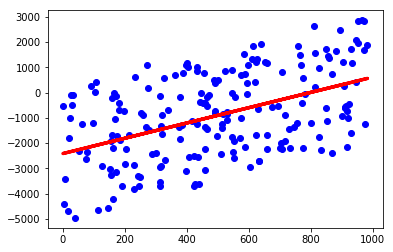

In [98]:
# scatterplot of new data x0 vs y with regression

new_x_zero = [ x0[i][0] for i in range(200) ]
plt.scatter(new_x_zero, new_y_data, color='blue')
plt.plot(new_x_zero, predictions_x0, color='red', linewidth=3.3)
plt.show()

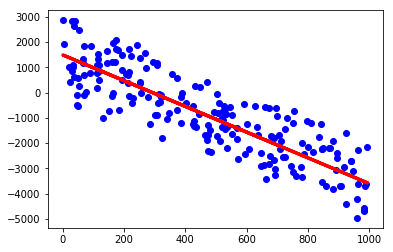

In [99]:
# scatterplot of new data x1 vs y with regression

# get mean of x_0:
# x_zero_vals = [ new_data[i][0] for i in range(200) ]
x_zero_mean = np.mean(x0)
# pad x_0 inputs
for i in range(200):
    new_data[i][0] = x_zero_mean

# predictions = lr.predict(np.sort(new_data, axis=0)) # sorted wrt new_data[0] axis
predictions = lr.predict(new_data)

###
###
###

new_x_one = [ x1[i][1] for i in range(200) ]

plt.scatter(new_x_one, new_y_data, color='blue')
plt.plot(new_x_one, predictions_x1, color='red', linewidth=3.3)
plt.show()